In [ ]:
#Importar paquetes necesarios
#Pandas
import pandas as pd
import numpy as np
#Seaborn visualizacion de datos
import seaborn as sns
import matplotlib.pyplot as plt
#Crear las variables de entrenamiento
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# Paquetes para seleccion de variables
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression #f_regressiones adecuado para problemas de regresión lineal, trabajando con datos numéricos
#Crear el modelo lineal
from sklearn.linear_model import LinearRegression
#Crear medidas de error
from sklearn.metrics import mean_squared_error, r2_score
#paquete para ejecutar prueba durbin-whatson
from statsmodels.stats.stattools import durbin_watson
#paquete para ejecutar prueba white
from statsmodels.stats.diagnostic import het_white
#Paquete para crear el grafico de probabilidad de los residuos
import scipy.stats as stats

In [ ]:
salesdata=pd.read_csv(r'C:\Users\juanm\Desktop\Provisional\K_class_sales_clean.csv')
salesdata.info()

In [ ]:
salesdata.head()

In [ ]:
sns.boxplot(salesdata, x='Item_Weight')

In [ ]:
salesdata.Item_Weight.describe()

In [ ]:
sns.scatterplot(salesdata[(salesdata.Item_Weight>0) & (salesdata.Item_Weight<22)], x='Item_Outlet_Sales',y='Item_Weight')

In [ ]:
salesdata.query("Item_Weight>22")

In [ ]:
salesdata.Item_Fat_Content.value_counts().plot(kind='bar')

In [ ]:
salesdata.Item_Fat_Content.replace(to_replace={"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"},inplace=True)
salesdata.Item_Fat_Content.value_counts().plot(kind='bar')

In [ ]:
sns.boxplot(salesdata, x='Item_Visibility')

In [ ]:
sns.scatterplot(salesdata[(salesdata.Item_Visibility<0.20)], x='Item_Outlet_Sales',y='Item_Visibility')

In [ ]:
salesdata.Item_Type.value_counts().plot(kind='bar')

In [ ]:
sns.boxplot(salesdata, x='Item_MRP')

In [ ]:
sns.scatterplot(salesdata, x='Item_Outlet_Sales',y='Item_MRP')

In [ ]:
salesdata.Outlet_Identifier.value_counts().plot(kind='bar')

In [ ]:
salesdata.Outlet_Size.value_counts().plot(kind='bar')

In [ ]:
salesdata.Outlet_Location_Type.value_counts().plot(kind='bar')

In [ ]:
salesdata.Outlet_Type.value_counts().plot(kind='bar')

In [ ]:
sns.boxplot(salesdata, x='Item_Outlet_Sales')

# Modelo Lineal Inicial

In [ ]:
#salesdata.select_dtypes("object").columns
#Agregar columnas dummies para variables categoricas
salesdata=pd.get_dummies(data=salesdata,columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],drop_first=True)

In [ ]:
salesdata.columns

In [ ]:
#Crear las variables con todo el dataframe
X=salesdata[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Profit',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 3', 'Outlet_Location_Type_Tier1',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']]
y=salesdata['Item_Outlet_Sales']

In [ ]:
salesdata.corr().Item_Outlet_Sales.to_frame().sort_values(by='Item_Outlet_Sales')

In [ ]:
# K hace referencia a nuestras variables
# Debe especificarse k
cantidadVariables=5
seleccion = SelectKBest(score_func=f_regression, k=cantidadVariables)
seleccion.fit_transform(X,y)
#La lista filtro indica cuales variables son las recomendadas
filtro = seleccion.get_support()
#Script para seleccionar las variables mas importantes
columnasOriginales=np.array(X.columns)
MejoresVariables=list(columnasOriginales[filtro])
print(MejoresVariables)
#Se ajusta X
X=X[MejoresVariables]


In [ ]:
#Crear el modelo lineal
mimodelo=LinearRegression()

In [ ]:
#Ajustar el modelo con validacion cruzada
resultadosvalidacioncruzada = cross_val_score(mimodelo, X, y, cv=5)
#Imprimir resultados de la validacion cruzada
print("%0.2f accuracy with a standard deviation of %0.2f" % (resultadosvalidacioncruzada.mean(), resultadosvalidacioncruzada.std()))

In [ ]:
#Ajustar el modelo
mimodelo.fit(X,y)

In [ ]:
#Separar los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
#Calcular los valores predichos
valorespred=mimodelo.predict(X_test)

In [ ]:
# Plot predicted vs actual
plt.scatter(y_test, valorespred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

In [ ]:
#Crear medidas de error
#Root Mean Square Error (RMSE). Se obtiene así una métrica absoluta en la misma unidad que la etiqueta. 
###Cuanto menor sea el valor, mejor será el modelo
rmse = np.sqrt(mean_squared_error(y_test, valorespred))
print("RMSE:", rmse)
#Coefficient of Determination. Representa qué parte de la varianza entre los valores predichos y reales de las etiquetas es capaz de explicar el modelo.
###cuanto mayor sea el valor, mejor será el ajuste del modelo.
r2 = r2_score(y_test, valorespred)
print("R2:", r2)

# Clustering numerico

In [ ]:
salesdata.select_dtypes('float64').columns

In [ ]:
#Paquete del modelo de kmeans
from sklearn.cluster import KMeans
#Paquetes de metricas
from sklearn import metrics

1 - salesdata[['Item_Weight']] k=4
Coeficiente de Silueta: 0.64
Índice Calinski-Harabasz: 28974.752884232617
Índice Davies-Bouldin: 0.39
2 - salesdata[['Item_Visibility']] k=4
Coeficiente de Silueta: 0.56
Índice Calinski-Harabasz: 23193.320517219945
Índice Davies-Bouldin: 0.57
3 - salesdata[['Item_MRP']] k=4
Coeficiente de Silueta: 0.62
Índice Calinski-Harabasz: 40289.43129372531
Índice Davies-Bouldin: 0.44
4 - salesdata[['Item_Weight', 'Item_Visibility']]
Coeficiente de Silueta: 0.64
Índice Calinski-Harabasz: 28947.33013698334
Índice Davies-Bouldin: 0.4
5 - salesdata[['Item_Weight', 'Item_MRP']]
Coeficiente de Silueta: 0.58
Índice Calinski-Harabasz: 35882.91500879208
Índice Davies-Bouldin: 0.49
6 - salesdata[['Item_Visibility', 'Item_MRP']]
Coeficiente de Silueta: 0.62
Índice Calinski-Harabasz: 40289.32441615007
Índice Davies-Bouldin: 0.44

In [ ]:
#Crear las variables de tipo NUMERICA pues se utiliza el promedio en el metodo
X=salesdata[['Item_Weight']]

In [ ]:
#Crear una lista para almacenar la inercia segun la cantidad de clauster
inercia = []
#Se generan varios modelos y se mide su inercia
for cantidadClauster in range(1 , 15):
    ModeloKMeans = KMeans(n_clusters = cantidadClauster ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') 
    ModeloKMeans.fit(X)
    inercia.append(ModeloKMeans.inertia_)

In [ ]:
#Graficar la inercia
#Seleccionar como K el numero de cluster donde la inercia comienza a ser cada vez mas cercana a la siguiente
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inercia , 'o')
plt.plot(np.arange(1 , 15) , inercia , '-' , alpha = 0.5)
plt.xlabel('Numero de cluster') , plt.ylabel('Inercia')
plt.show()
#Se debe seleccionar K en este caso como 5, con este se crea el modelo real

In [ ]:
# El k debe ser especificado de acuerdo al resultado del paso anterior
k=4
ModeloKMeansFinal = KMeans(n_clusters = k ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') 
ModeloKMeansFinal.fit(X)

In [ ]:
#Validar metricas del modelo
labels = ModeloKMeansFinal.labels_
print(f"Coeficiente de Silueta: {metrics.silhouette_score(X, labels) :.2}")
print(f"Índice Calinski-Harabasz: {metrics.calinski_harabasz_score(X, labels)}")
print(f"Índice Davies-Bouldin: {metrics.davies_bouldin_score(X, labels) :.2}")

In [ ]:
salesdata.info()

In [ ]:
pruebasClas1=salesdata[['Item_Weight','Item_Outlet_Sales']]
pruebasClas1['KGroup']=ModeloKMeansFinal.predict(pruebasClas1[['Item_Weight']])

In [ ]:
pruebasClas1

In [ ]:
sns.scatterplot(pruebasClas1[pruebasClas1.KGroup==3],x='Item_Outlet_Sales',y='Item_MRP',hue='KGroup')

In [ ]:
pruebasClas1[pruebasClas1.KGroup==].corr()

# Clasificacion string

In [ ]:
salesdata.select_dtypes('object').columns

In [ ]:
from itertools import combinations

# Lista de palabras
palabras = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Crear una lista para almacenar las combinaciones
combinaciones = []

# Generar combinaciones con cantidad variable de elementos
for r in range(1, len(palabras) + 1):
    combinaciones.extend(combinations(palabras, r))

# Convertir las combinaciones en una lista de listas
combinaciones_listas = [list(comb) for comb in combinaciones]
combinaciones_listas

In [ ]:
from kmodes.kmodes import KModes
# Paquete de metricas
from sklearn import metrics

['Item_Fat_Content']


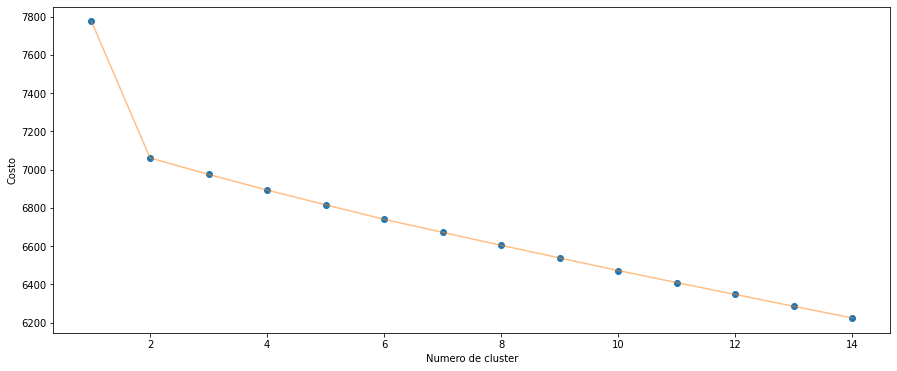

['Item_Type']


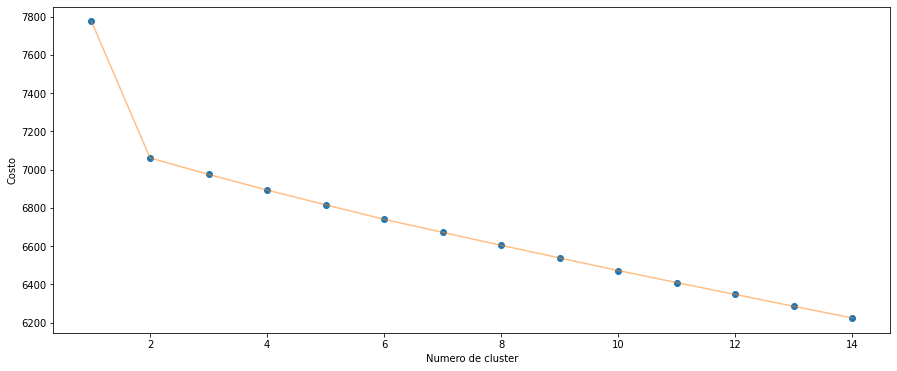

['Outlet_Identifier']


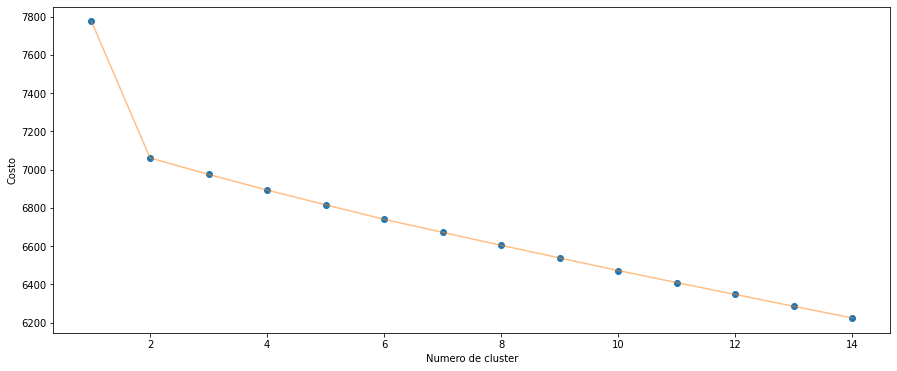

['Outlet_Size']


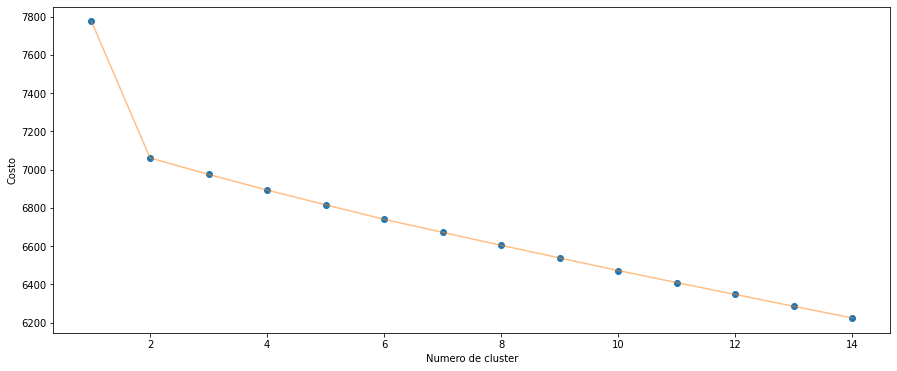

['Outlet_Location_Type']


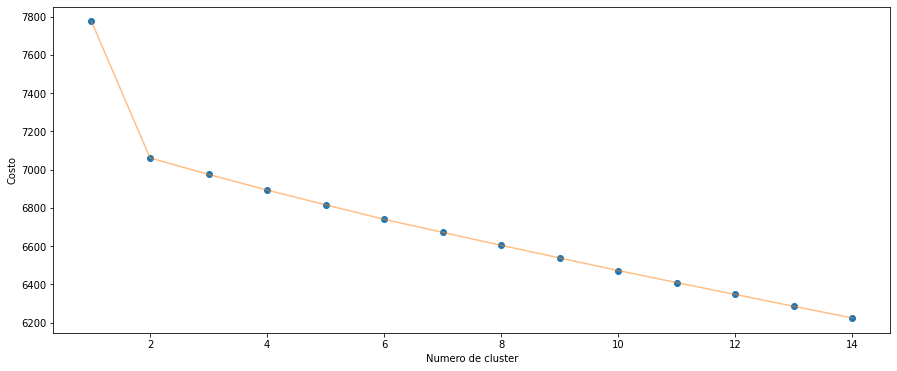

['Outlet_Type']


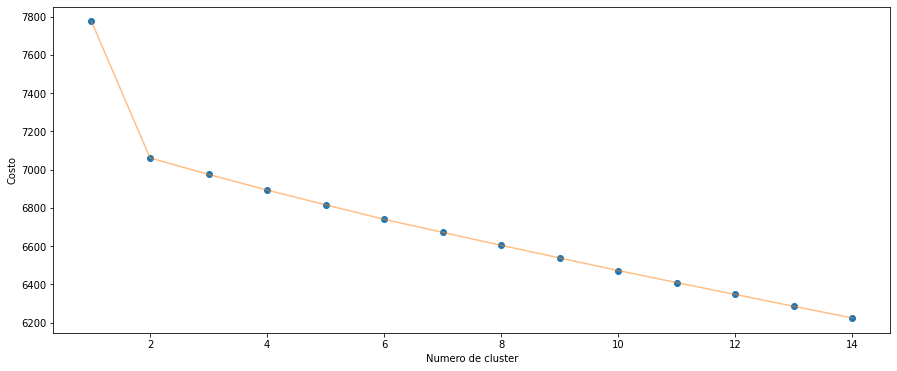

['Item_Fat_Content', 'Item_Type']


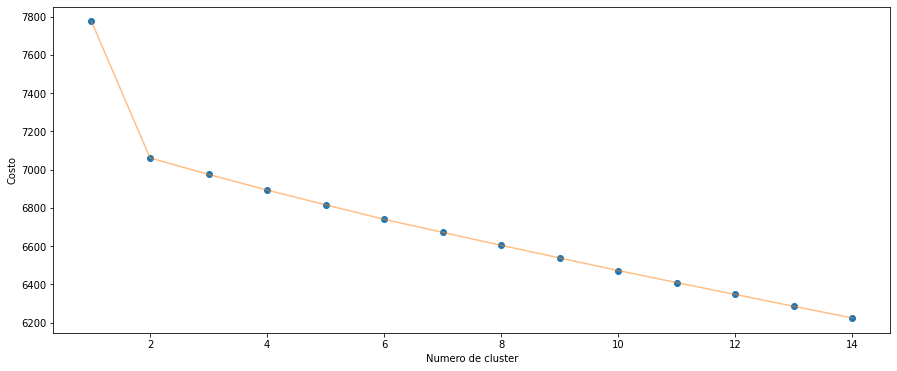

['Item_Fat_Content', 'Outlet_Identifier']


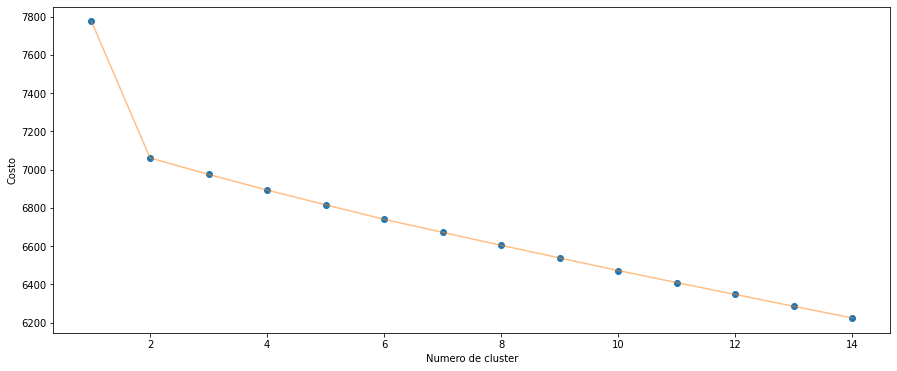

['Item_Fat_Content', 'Outlet_Size']


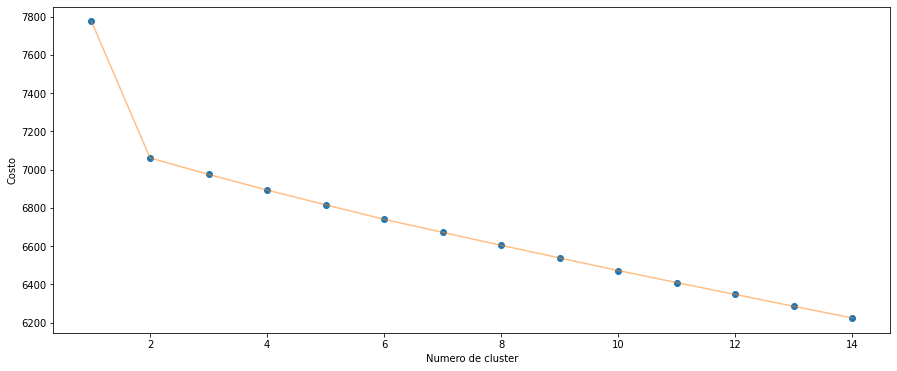

['Item_Fat_Content', 'Outlet_Location_Type']


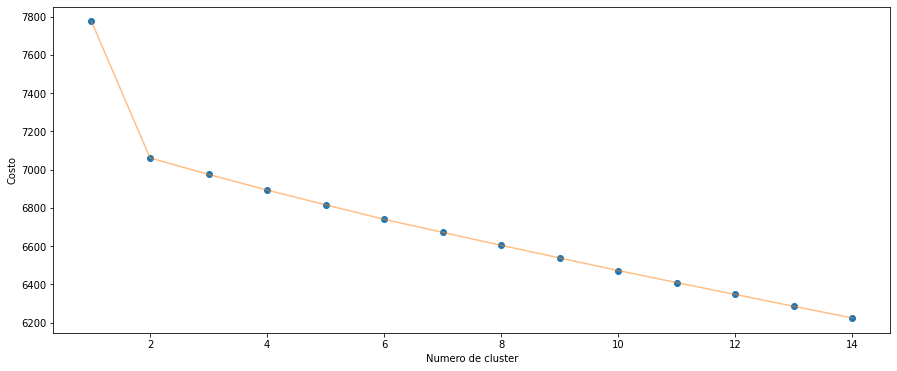

['Item_Fat_Content', 'Outlet_Type']


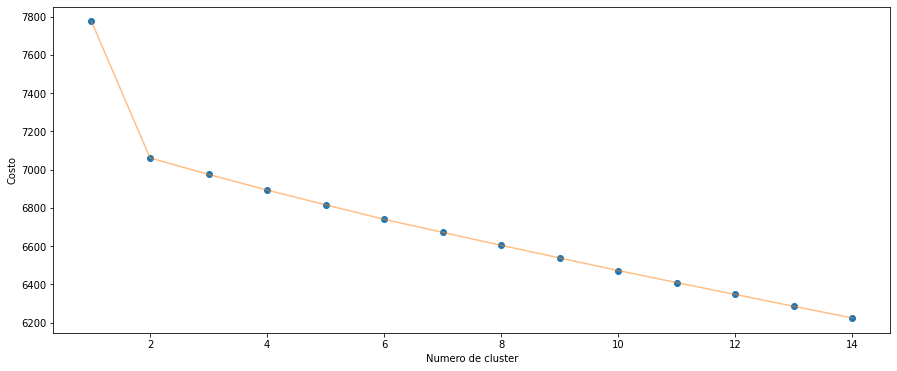

['Item_Type', 'Outlet_Identifier']


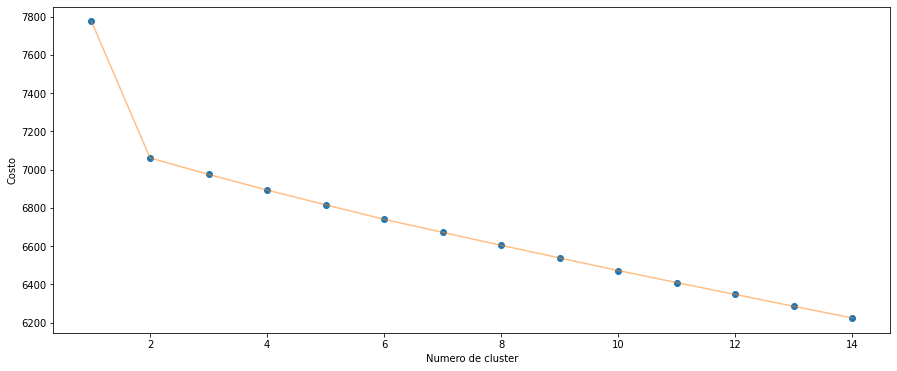

['Item_Type', 'Outlet_Size']


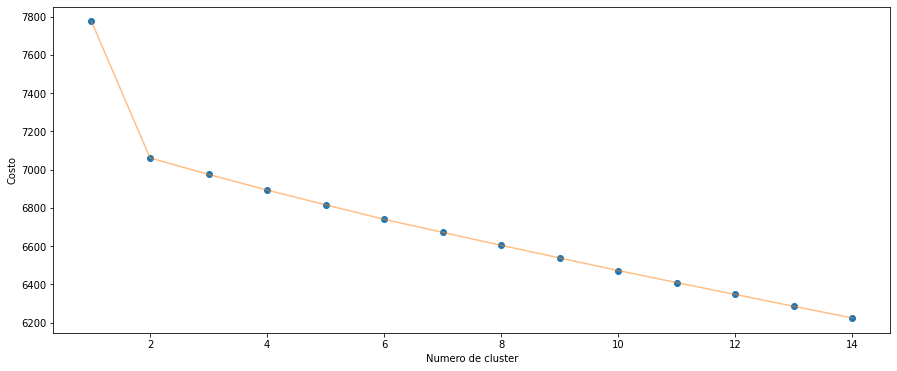

['Item_Type', 'Outlet_Location_Type']


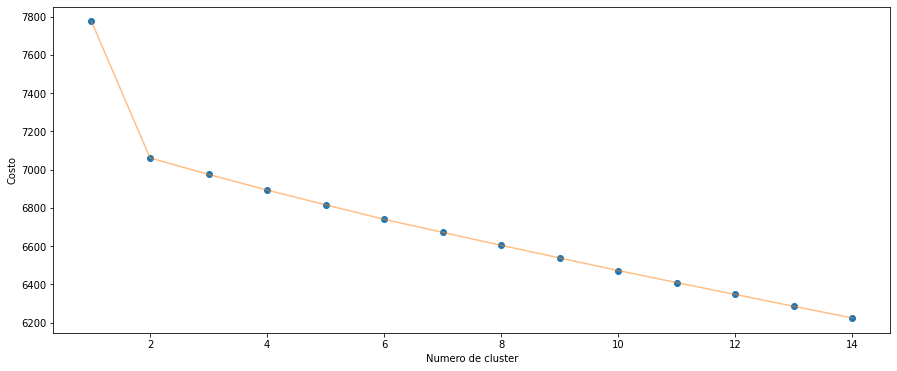

['Item_Type', 'Outlet_Type']


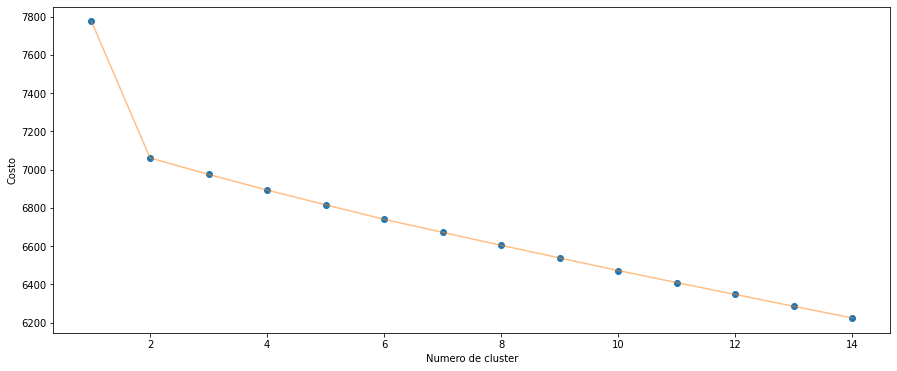

['Outlet_Identifier', 'Outlet_Size']


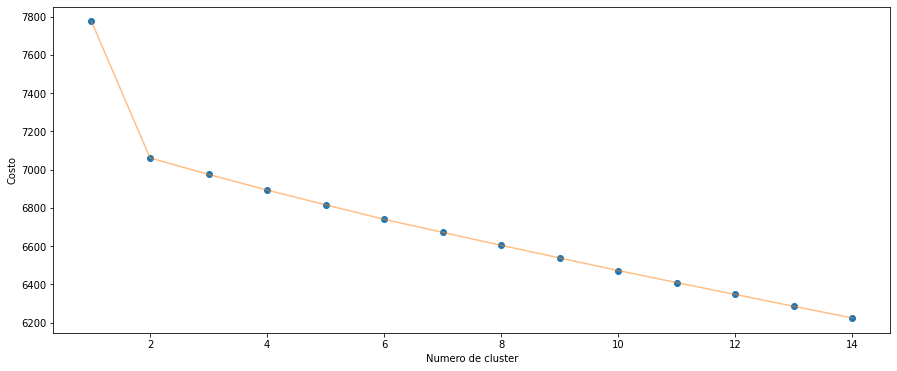

['Outlet_Identifier', 'Outlet_Location_Type']


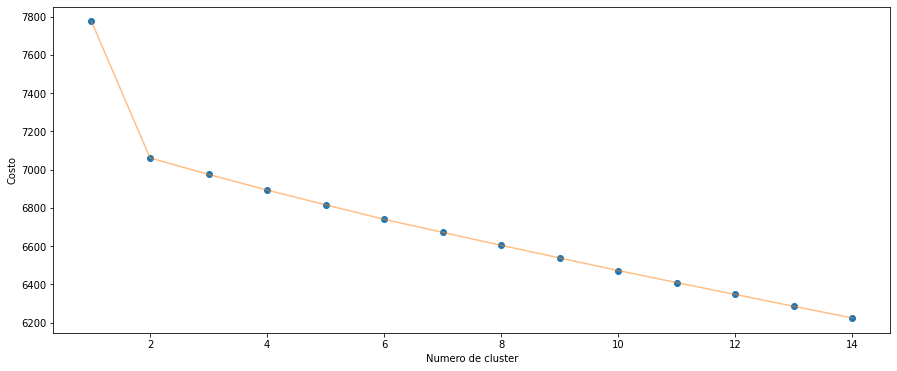

['Outlet_Identifier', 'Outlet_Type']


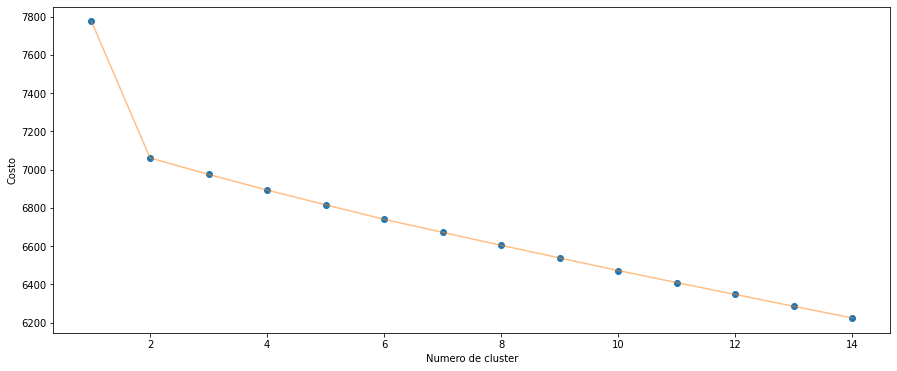

['Outlet_Size', 'Outlet_Location_Type']


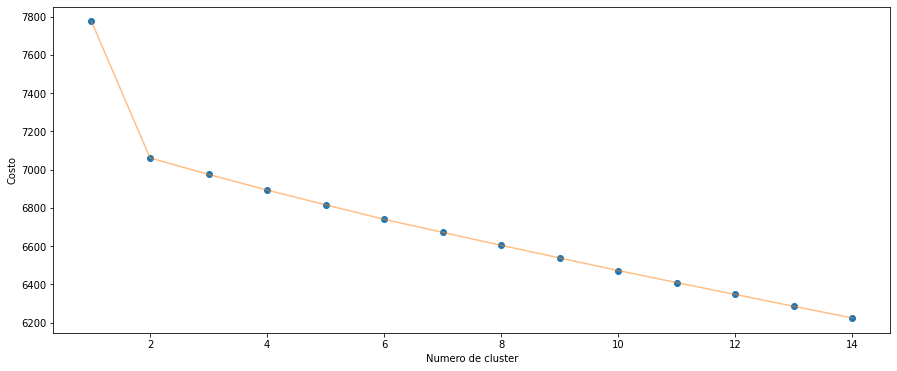

['Outlet_Size', 'Outlet_Type']


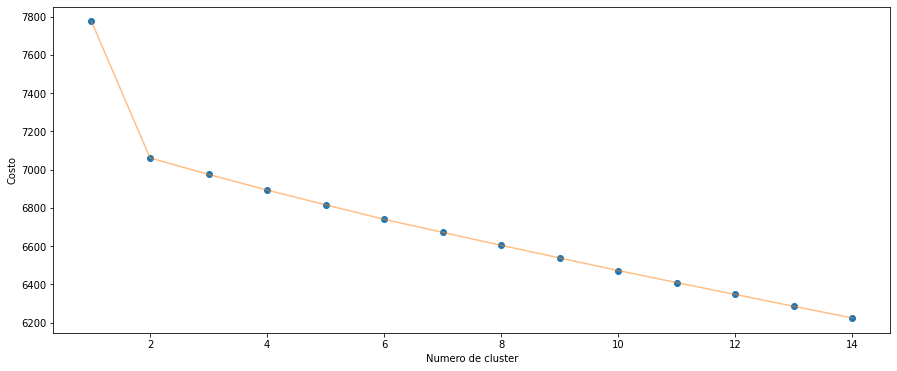

['Outlet_Location_Type', 'Outlet_Type']


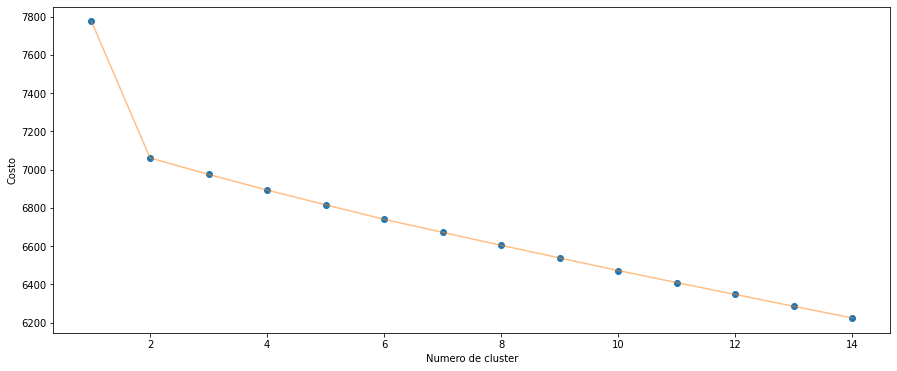

['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier']


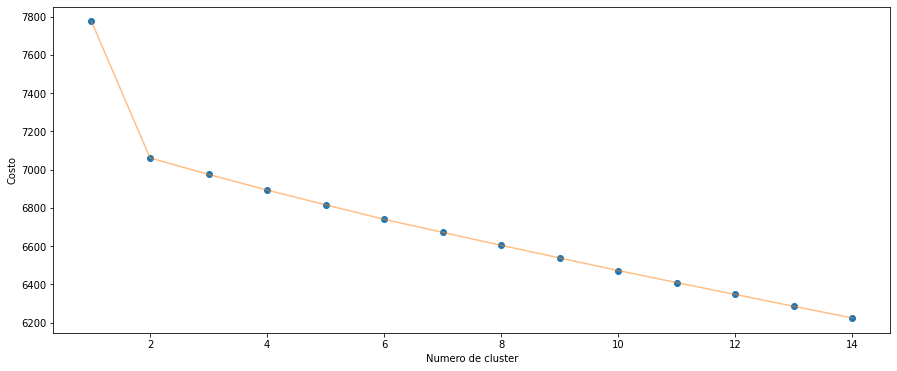

['Item_Fat_Content', 'Item_Type', 'Outlet_Size']


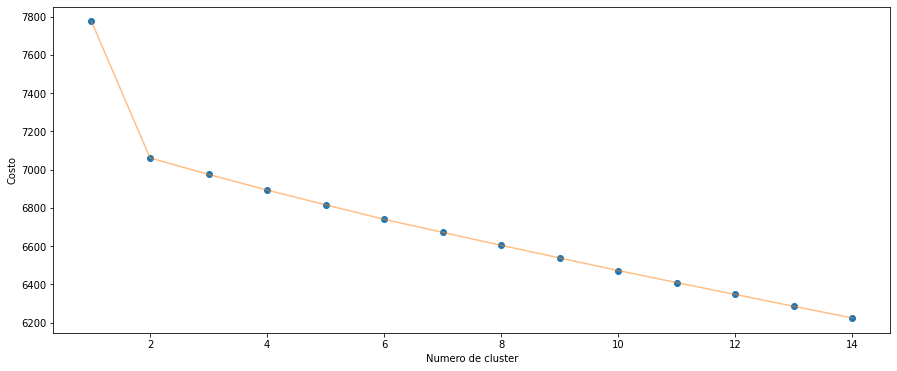

['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type']


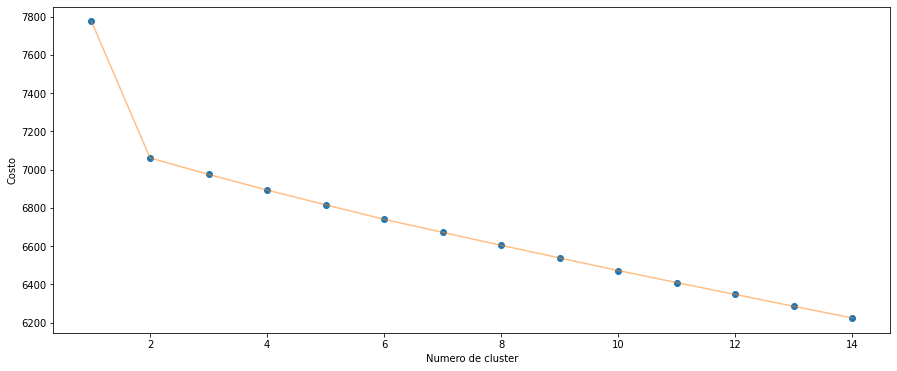

['Item_Fat_Content', 'Item_Type', 'Outlet_Type']


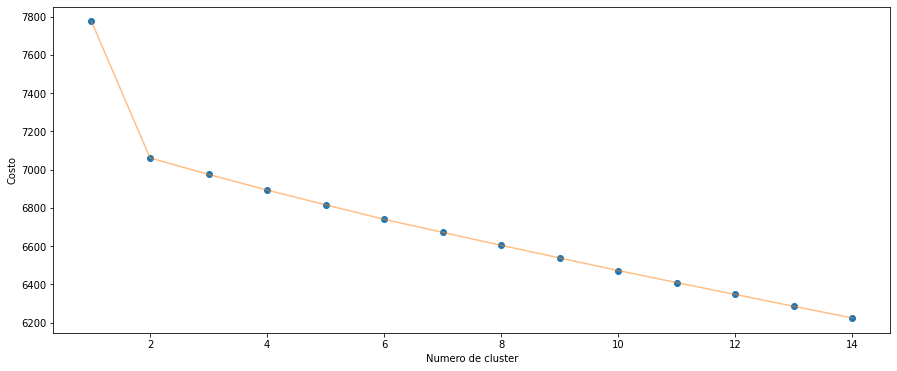

['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size']


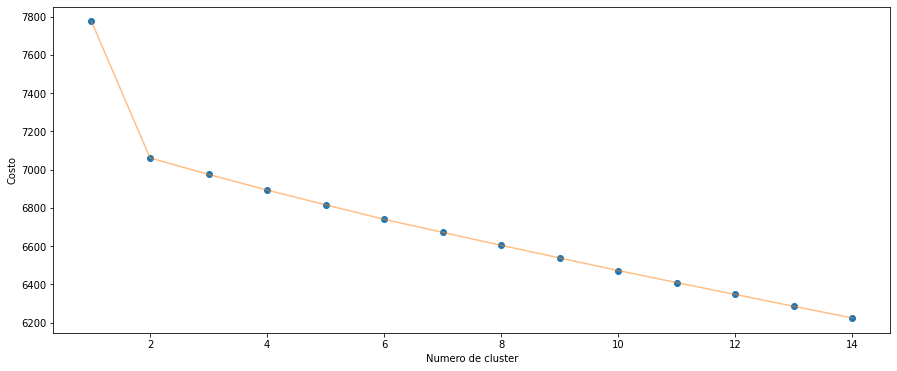

['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Location_Type']


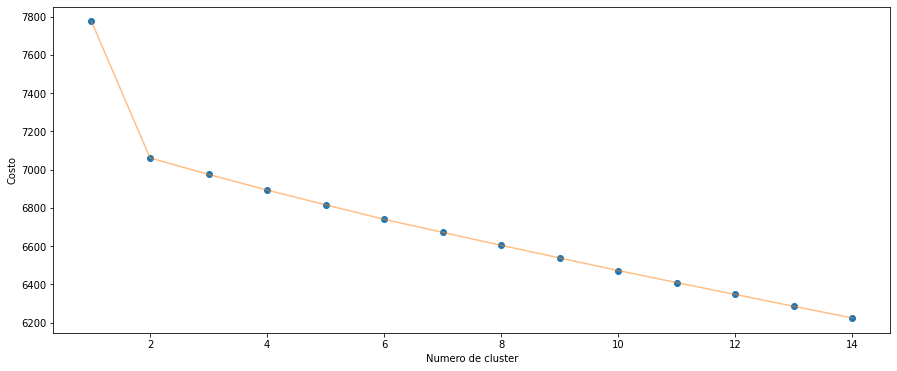

['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Type']


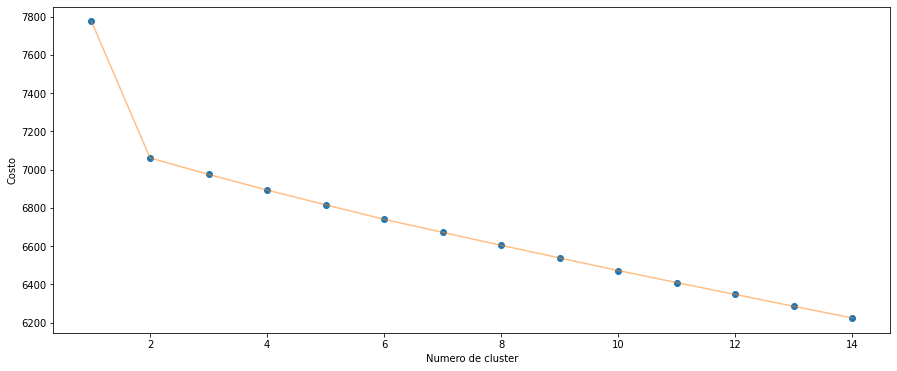

['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']


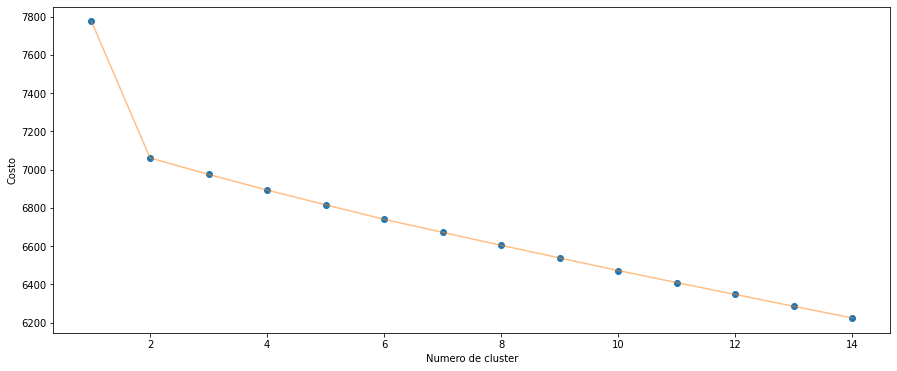

['Item_Fat_Content', 'Outlet_Size', 'Outlet_Type']


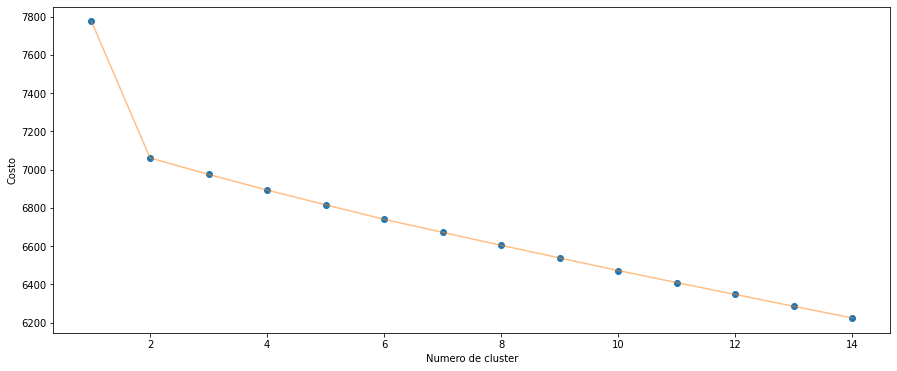

['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Type']


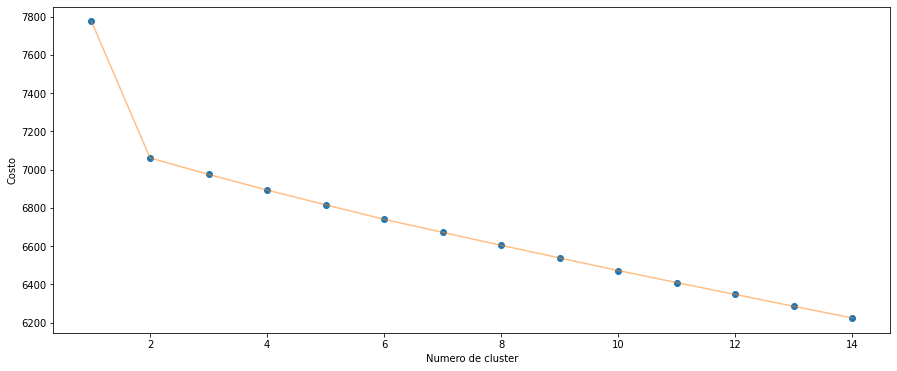

['Item_Type', 'Outlet_Identifier', 'Outlet_Size']


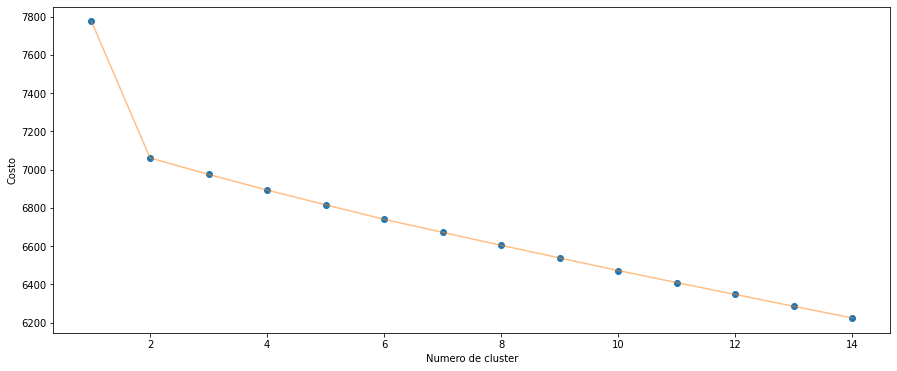

['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type']


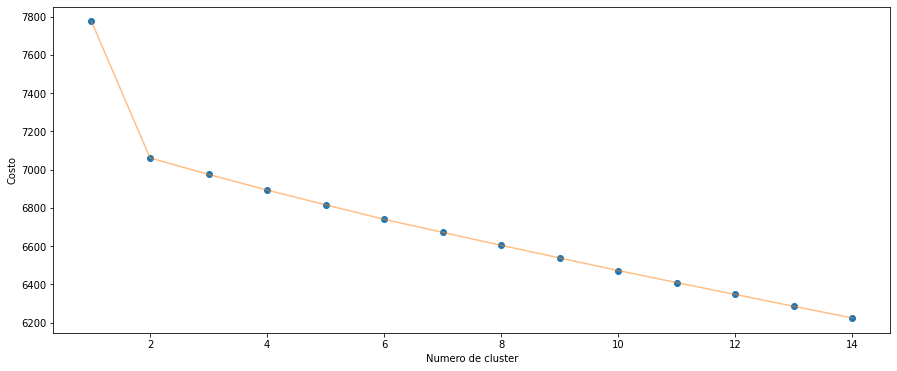

['Item_Type', 'Outlet_Identifier', 'Outlet_Type']


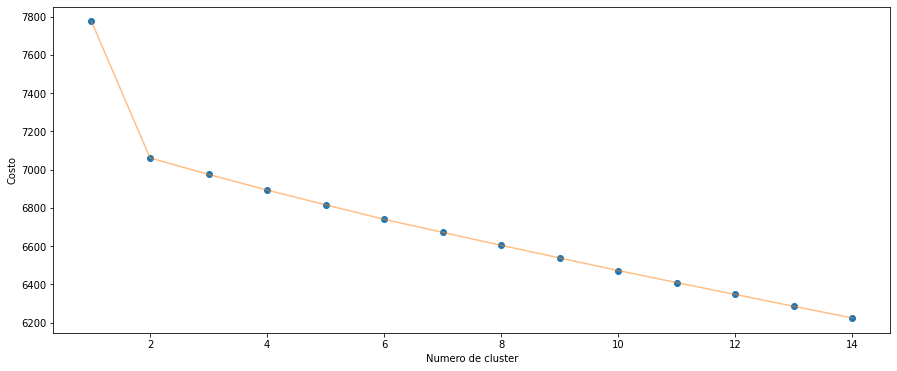

['Item_Type', 'Outlet_Size', 'Outlet_Location_Type']


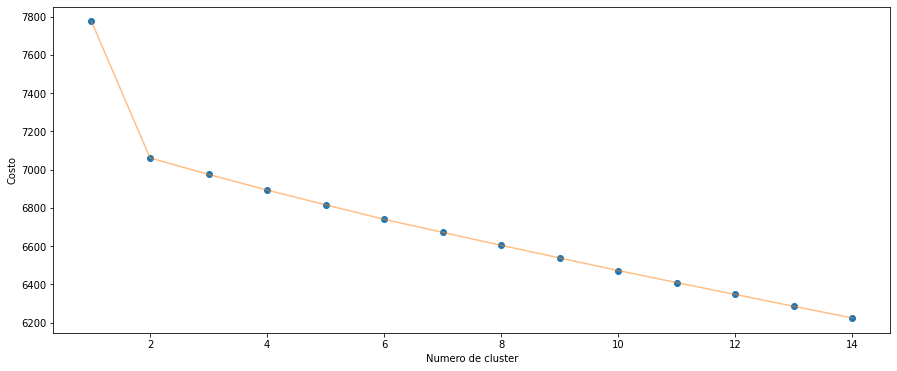

['Item_Type', 'Outlet_Size', 'Outlet_Type']


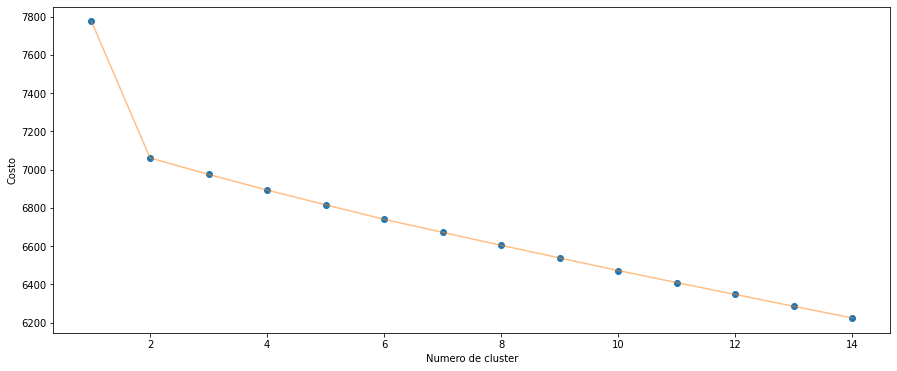

['Item_Type', 'Outlet_Location_Type', 'Outlet_Type']


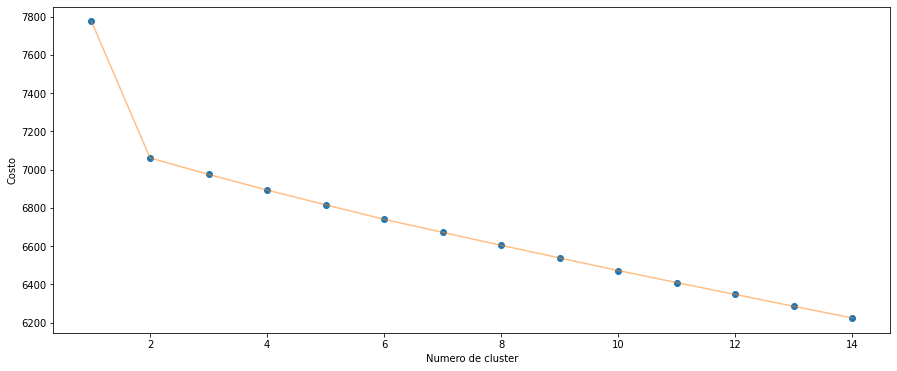

['Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type']


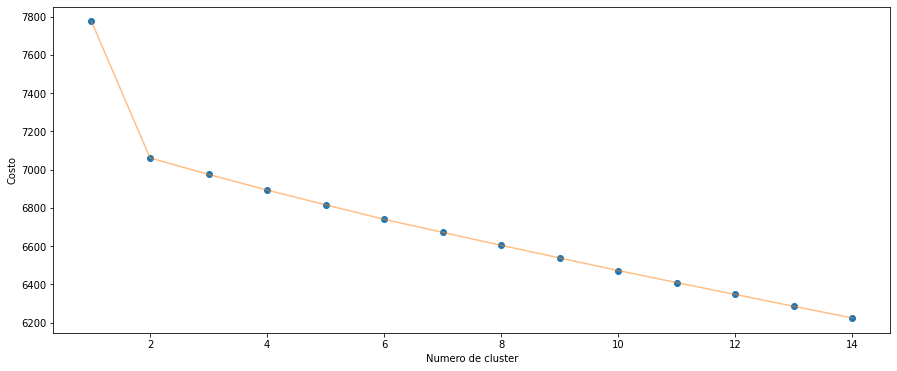

['Outlet_Identifier', 'Outlet_Size', 'Outlet_Type']


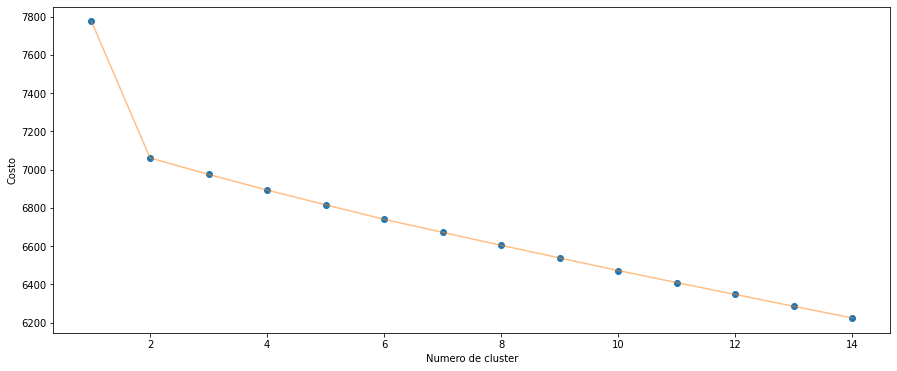

['Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']


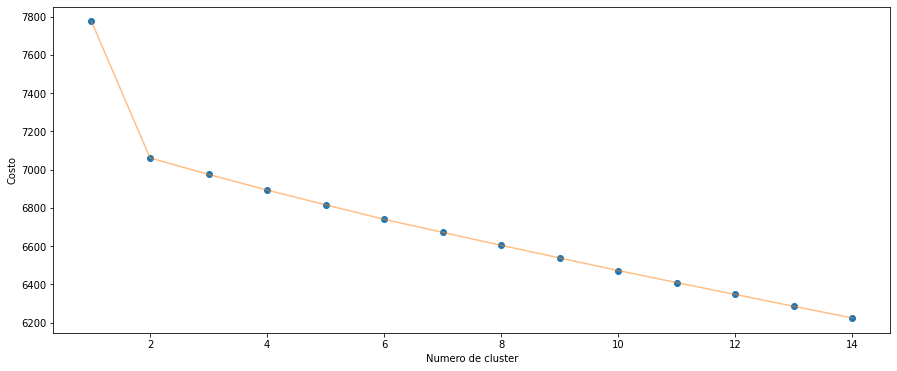

['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


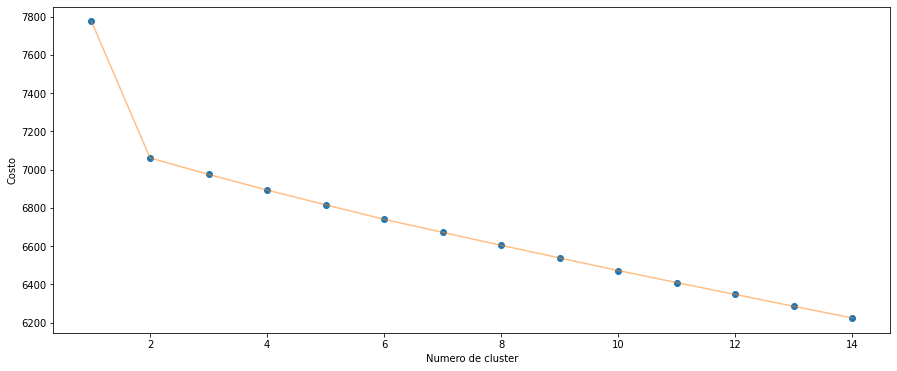

['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size']


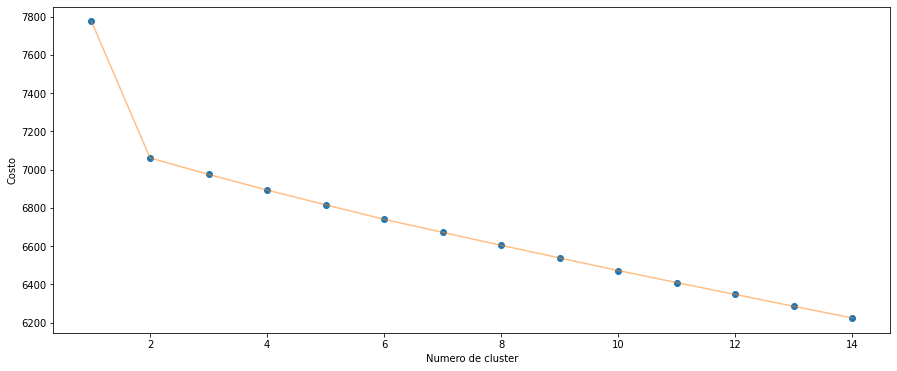

['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type']


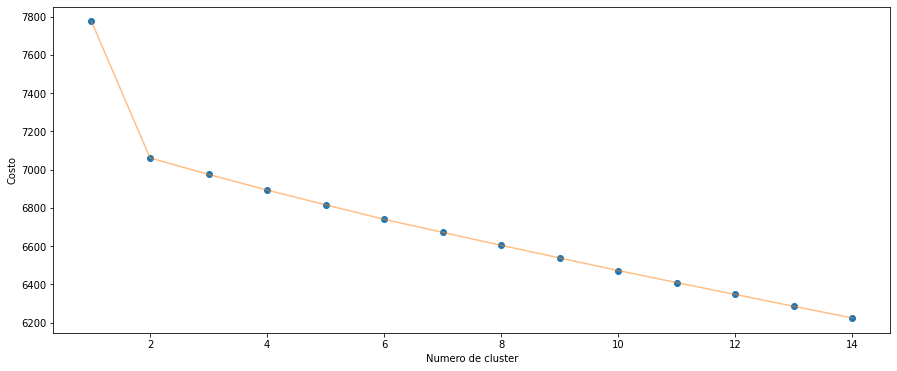

['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type']


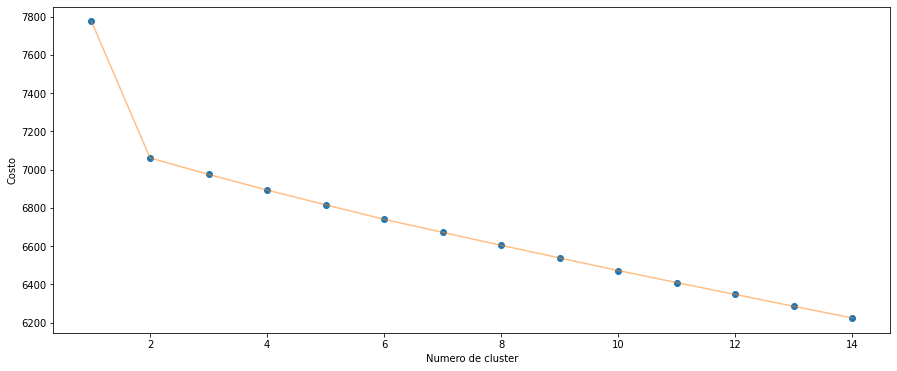

['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type']


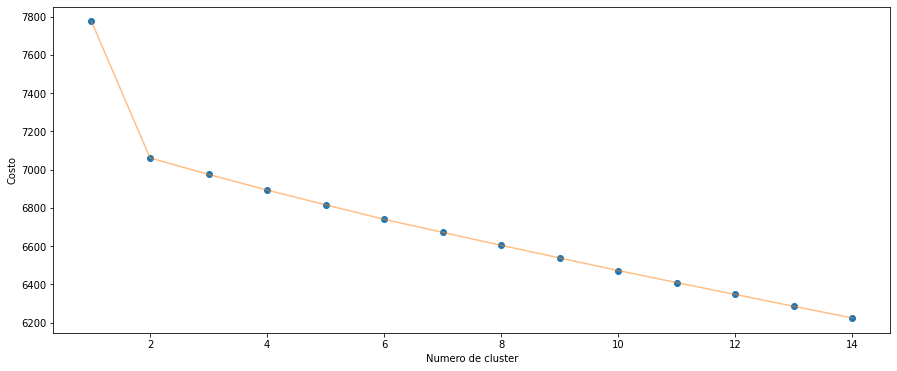

['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Type']


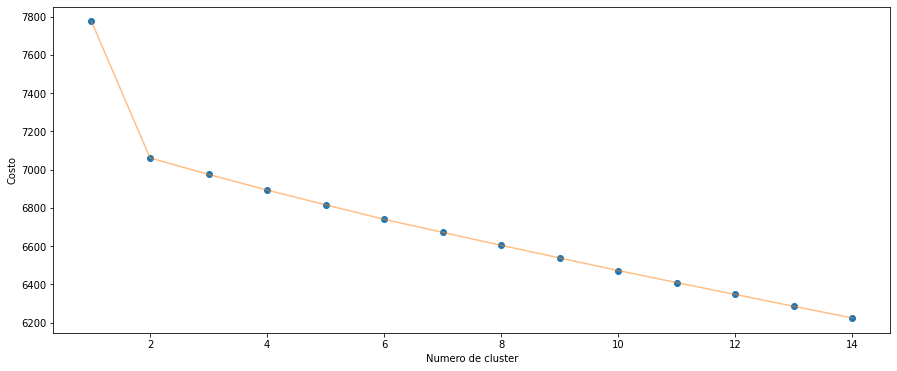

['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']


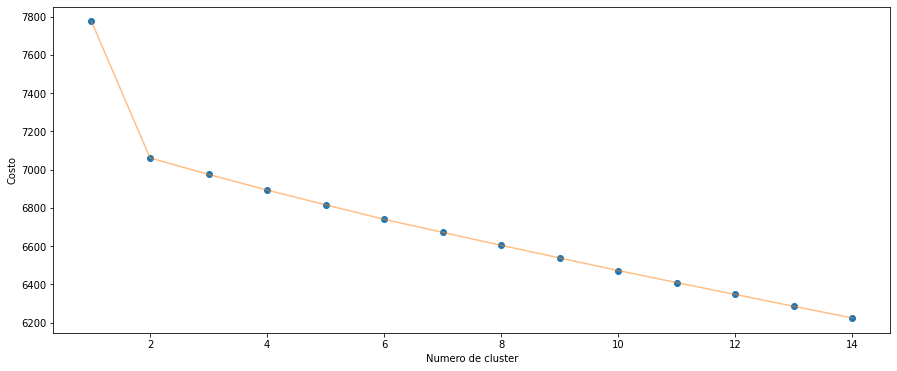

['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type']


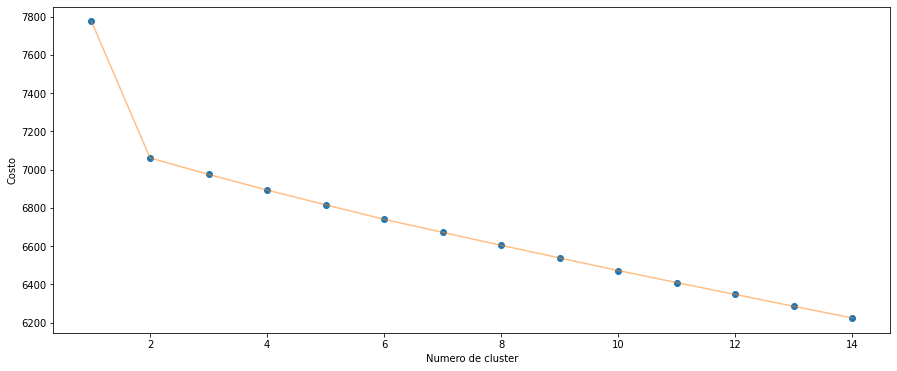

['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type']


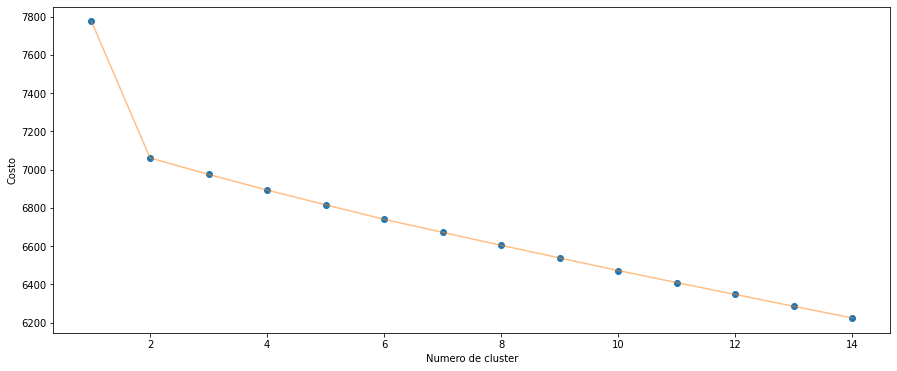

['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']


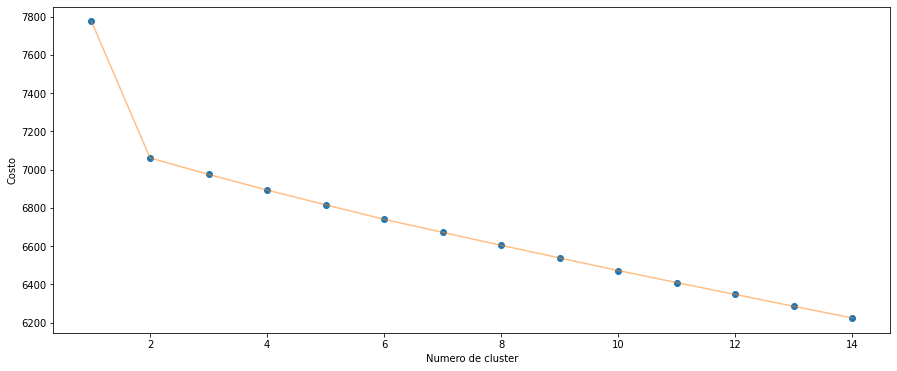

['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


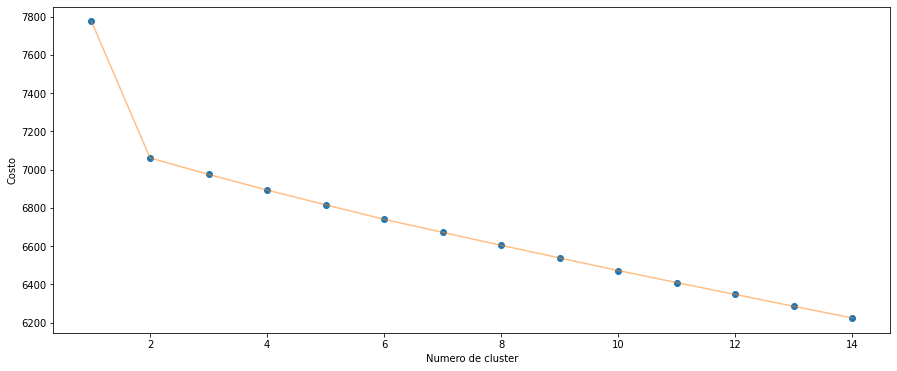

['Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type']


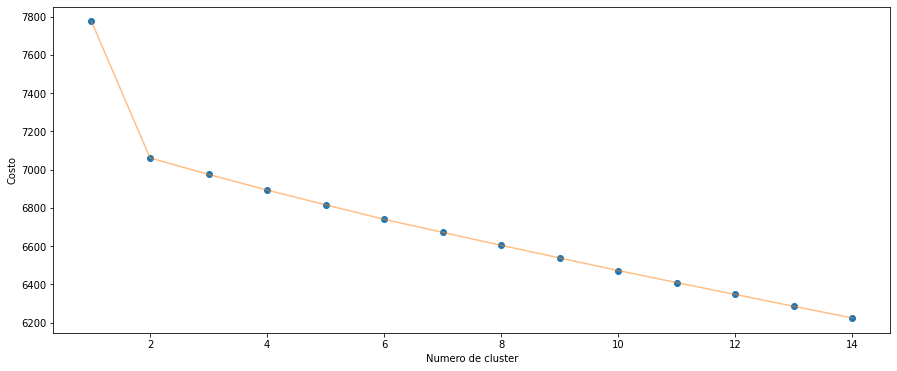

['Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type']


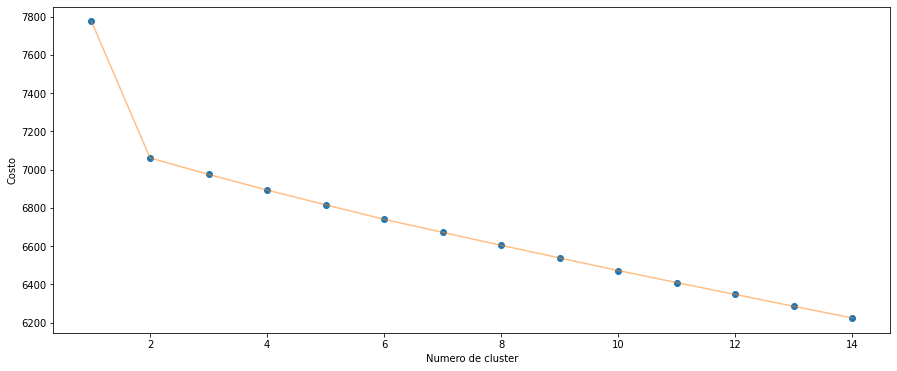

['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']


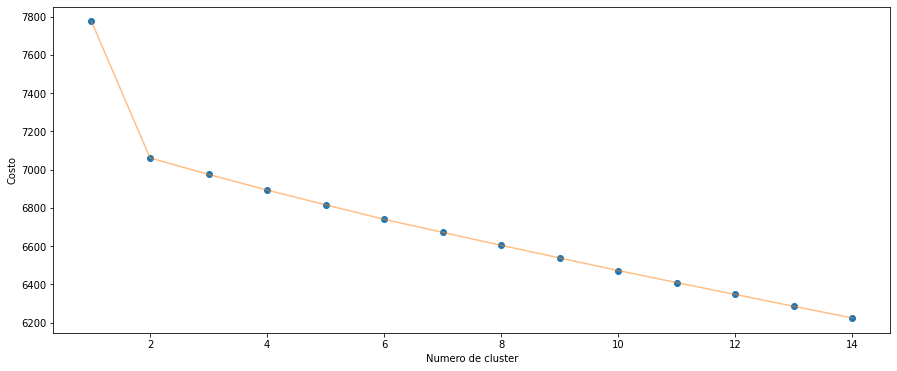

['Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


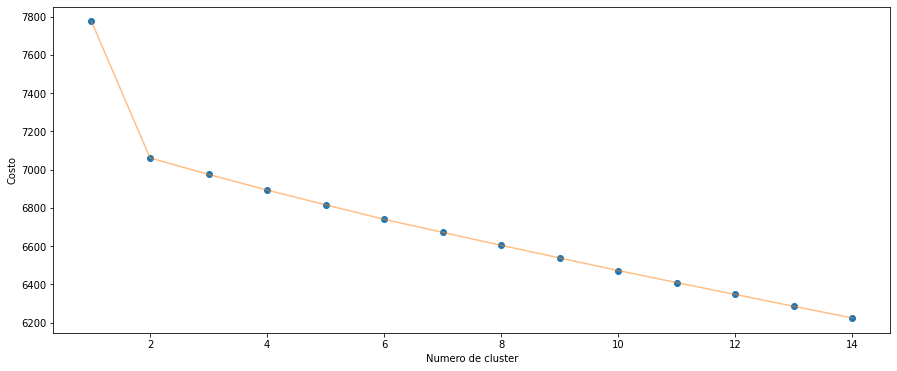

['Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


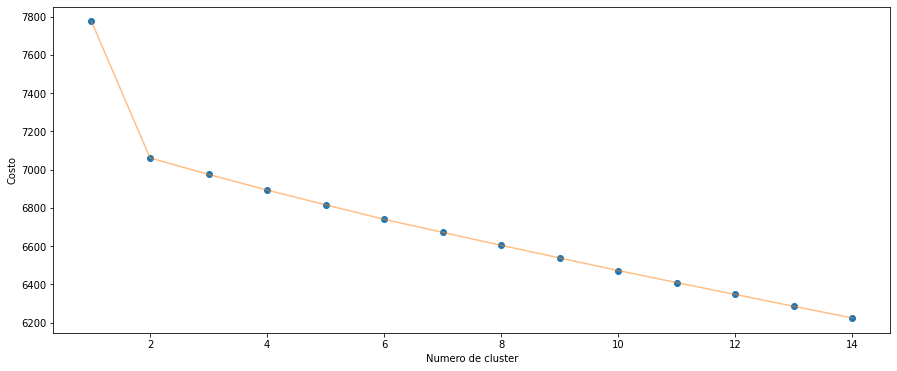

['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type']


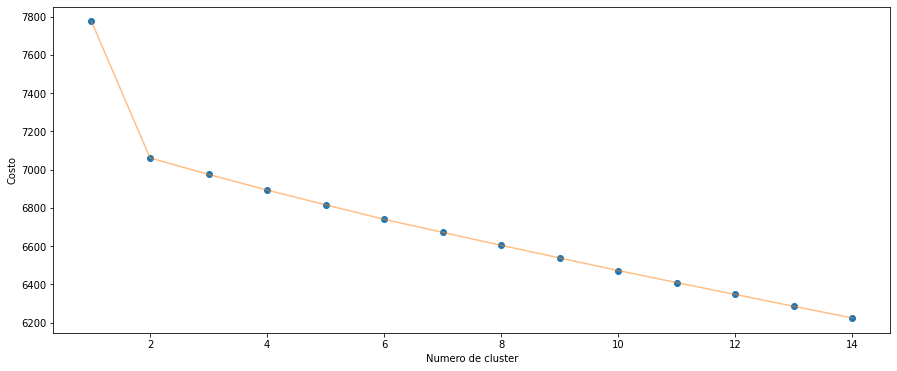

['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type']


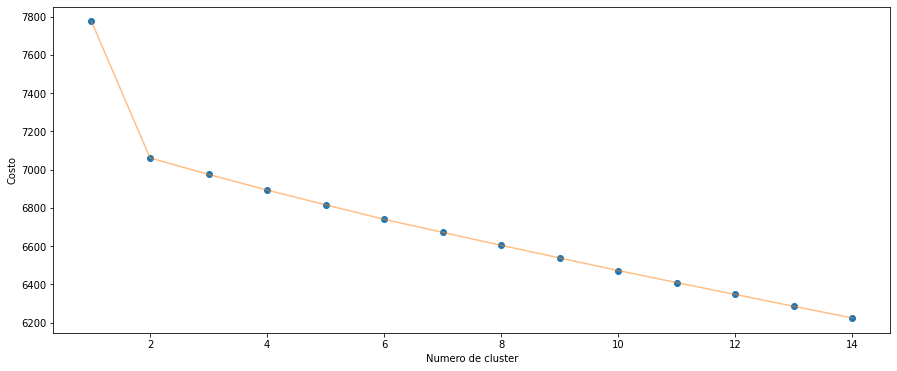

['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']


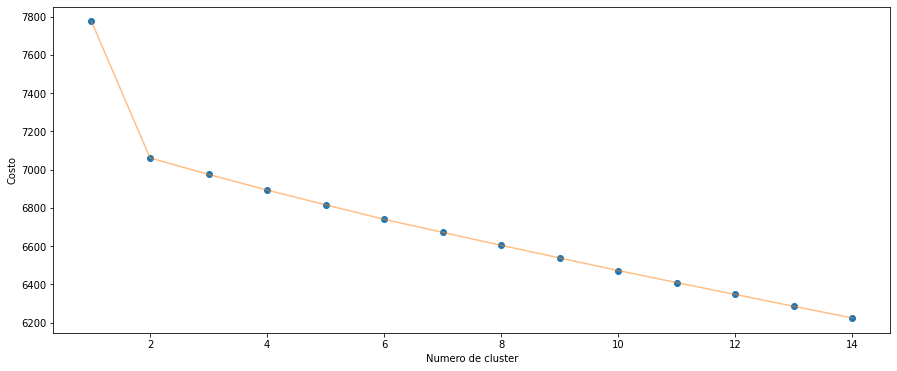

['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


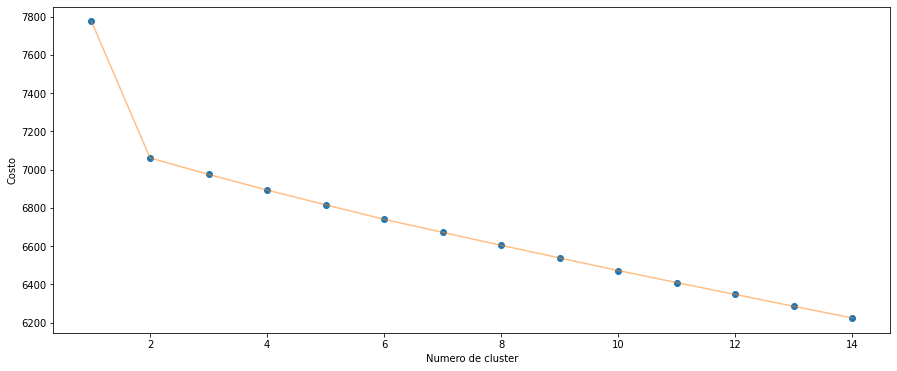

['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


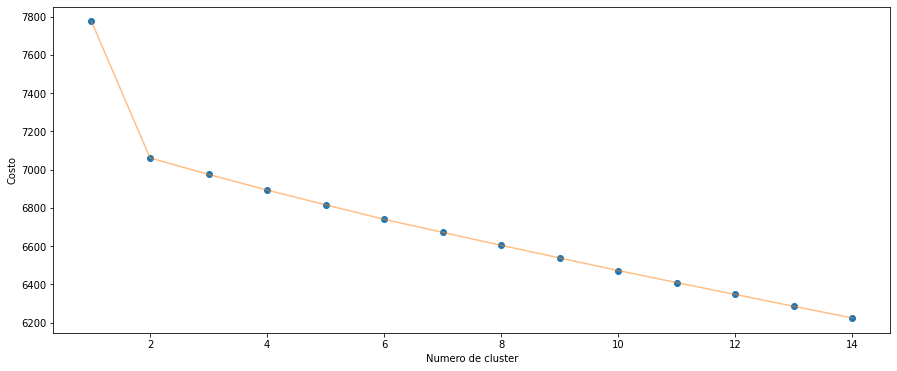

['Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


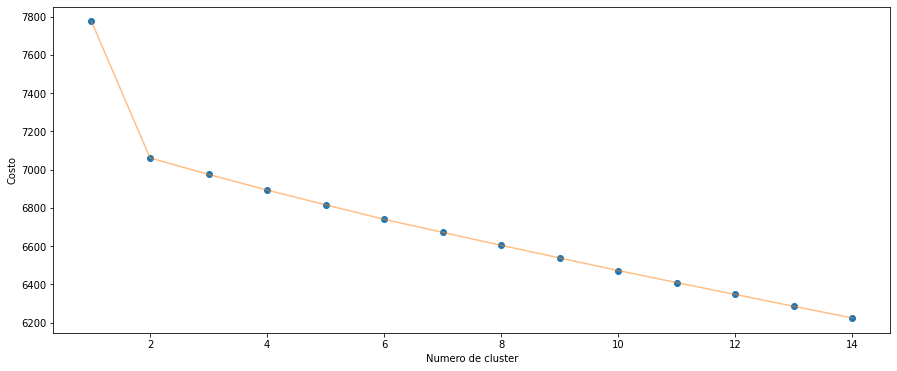

['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


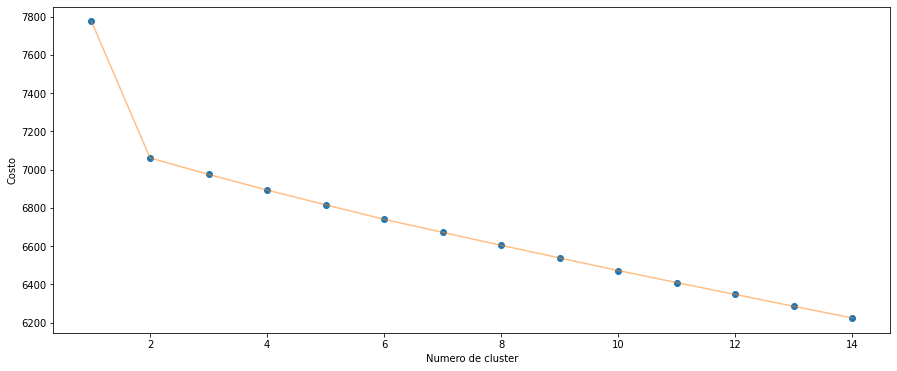

In [152]:
for i in combinaciones_listas:
    salesdata[i]
    #Crear una lista para almacenar el costo segun la cantidad de clauster
    costo = []
    #Se generan varios modelos y se mide su inercia
    for cantidadClauster in range(1 , 15):
        ModeloKModes = KModes(n_clusters = cantidadClauster ,init='Cao', n_init = 5 ,max_iter=10,random_state= 111) 
        ModeloKModes.fit(X)
        costo.append(ModeloKModes.cost_)
    #Graficar el costo
    print(i)
    #Seleccionar como K el numero de cluster donde la inercia comienza a ser cada vez mas cercana a la siguiente
    plt.figure(1 , figsize = (15 ,6))
    plt.plot(np.arange(1 , 15) , costo , 'o')
    plt.plot(np.arange(1 , 15) , costo , '-' , alpha = 0.5)
    plt.xlabel('Numero de cluster') , plt.ylabel('Costo')
    plt.show()
    #Se debe seleccionar K en este caso como 3, con este se crea el modelo real